In [1]:
import pandas as pd
import nltk
from nltk.util import ngrams

In [27]:
queries_sequence_df = pd.read_pickle("./queries_sequence_df.pkl")
songs_sequence_df = pd.read_pickle("./songs_sequence_df.pkl")

In [28]:
encoding_types_cols = ['pitch_diff','UpSameDown']

## Append Ngrams Sets

In [29]:
def create_n_gram_set_from_encoding(seq, n):
    n_grams = ngrams(seq, n)
    n_grams = [str(x) for x in n_grams]
    return list(n_grams)

In [30]:
ngrams_size = [5,8,10,12] 
for n in ngrams_size:
    for encoding_col in encoding_types_cols:
        result_col = f'{encoding_col}-ngram_{n}_set'
        queries_sequence_df[result_col] = queries_sequence_df[encoding_col].apply(lambda x: create_n_gram_set_from_encoding(x,n))
        songs_sequence_df[result_col] = songs_sequence_df[encoding_col].apply(lambda x: create_n_gram_set_from_encoding(x,n))


## Append Multi Gram

In [31]:
def get_multi_gram(seq, from_n = 3, to_n=5):
    result = []
    for i in range(from_n, to_n+1):
        result = result + create_n_gram_set_from_encoding(seq,i)
    return result


In [32]:
multi_gram_configs = [(5,10)] 
for p in multi_gram_configs:
    for encoding_col in encoding_types_cols:
        result_col = f'{encoding_col}-multi_gram_{p[0]}_{p[1]}_set'
        queries_sequence_df[result_col] = queries_sequence_df[encoding_col].apply(lambda x: get_multi_gram(x,p[0],p[1]))
        songs_sequence_df[result_col] = songs_sequence_df[encoding_col].apply(lambda x: get_multi_gram(x,p[0],p[1]))

## Save Sets

In [80]:
cols = queries_sequence_df.columns
set_cols = list(filter(lambda x: x.endswith("_set"), cols))

for c in set_cols:
    queries_sequence_df[c] = queries_sequence_df[c].apply(lambda x: set(x))
    songs_sequence_df[c] = songs_sequence_df[c].apply(lambda x: set(x))


In [84]:
queries_sequence_df[['Query ID','Song ID']+set_cols].to_pickle("./queries_sets.pkl")

In [85]:
songs_sequence_df[['Song ID']+set_cols].to_pickle("./songs_sets.pkl")

In [18]:
# TESTING

# queries_sequence_df = pd.read_pickle("./queries_sets.pkl")
# songs_sequence_df = pd.read_pickle("./songs_sets.pkl")


In [19]:
# cols = queries_sequence_df.columns
# set_cols = list(filter(lambda x: x.endswith("_set"), cols))

# for c in set_cols:
#     queries_sequence_df[f"{c}_len"] = queries_sequence_df[c].apply(lambda x: len(x))
#     songs_sequence_df[f"{c}_len"] = songs_sequence_df[c].apply(lambda x: len(x))

In [37]:
queries_sequence_df["pitch_diff_len"] = queries_sequence_df["pitch_diff"].apply(lambda x:len(x)) 

In [38]:
queries_sequence_df["pitch_diff_len"].describe()

count    118.000000
mean      33.305085
std       17.064738
min        9.000000
25%       22.000000
50%       30.000000
75%       40.000000
max      106.000000
Name: pitch_diff_len, dtype: float64

<Axes: >

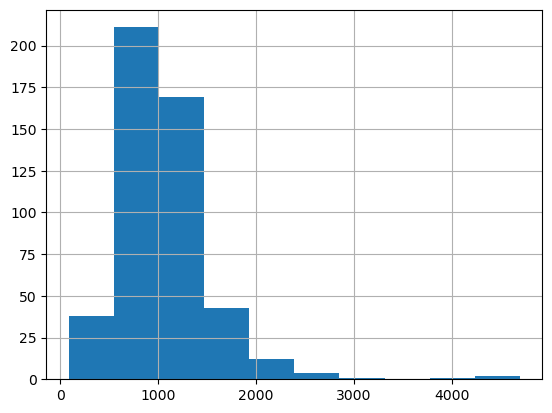

In [24]:
songs_sequence_df[f"{c}_len"].hist()